In [1]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

In [2]:
df= pd.read_csv("./input/provinces.csv",encoding='latin1')
df.head()


,province,year,population,region
0,Adana,2007,2006650,Mediterranean Region
1,Adana,2008,2026319,Mediterranean Region
2,Adana,2009,2062226,Mediterranean Region
3,Adana,2010,2085225,Mediterranean Region
4,Adana,2011,2108805,Mediterranean Region


In [3]:
current_year = 2018
dff = df[df['year'].eq(current_year)].sort_values(by='population', ascending=False).head(15)
dff

,province,year,population,region
479,Istanbul,2018,15067724,Marmara Region
83,Ankara,2018,5503985,Central Anatolia Region
491,Izmir,2018,4320519,Aegean Region
251,Bursa,2018,2994521,Marmara Region
95,Antalya,2018,2426356,Mediterranean Region
11,Adana,2018,2220125,Mediterranean Region
635,Konya,2018,2205609,Central Anatolia Region
815,Sanliurfa,2018,2035809,Southeast Anatolia Region
395,Gaziantep,2018,2028563,Southeast Anatolia Region
623,Kocaeli,2018,1906391,Marmara Region


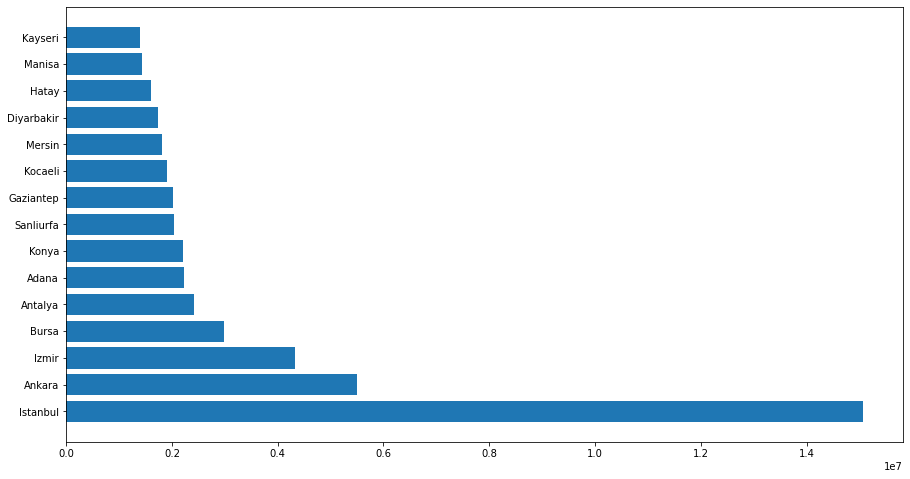

In [4]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(dff['province'], dff['population'])
colors = dict(zip(
    ['Marmara Region','Aegean Region','Mediterranean Region','Central Anatolia Region','Black Sea Region','Eastern Anatolia Region','Southeast Anatolia Region'],
    ['#adb0ff', '#ffb3ff', '#90d595', '#e48381', '#aafbff', '#f7bb5f', '#eafb50']
))
group_lk = df.set_index('province')['region'].to_dict()

Text(1, 0.4, '2018')

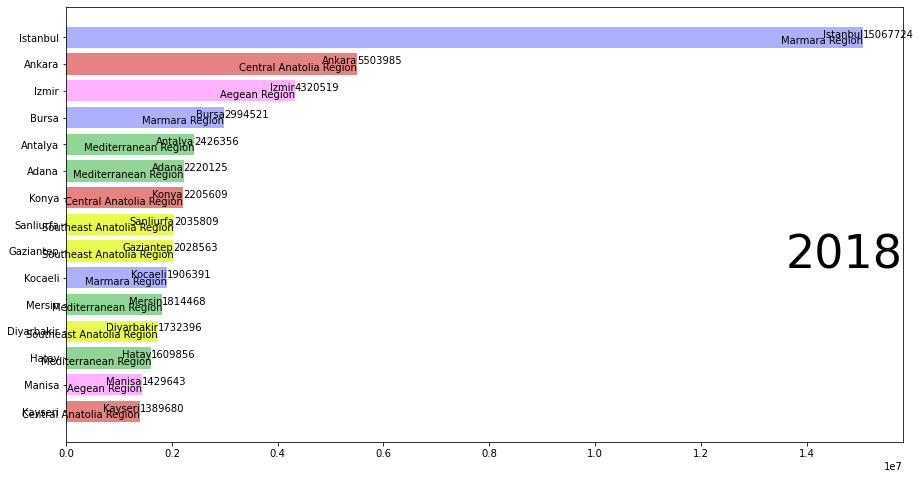

In [5]:
fig, ax = plt.subplots(figsize=(15, 8))
dff = dff[::-1]   # flip values from top to bottom
# pass colors values to `color=`
ax.barh(dff['province'], dff['population'], color=[colors[group_lk[x]] for x in dff['province']])
# iterate over the values to plot labels and values (Tokyo, Asia, 38194.2)
for i, (value, name) in enumerate(zip(dff['population'], dff['province'])):
    ax.text(value, i,     name,            ha='right')  # Tokyo: name
    ax.text(value, i-.25, group_lk[name],  ha='right')  # Asia: group name
    ax.text(value, i,     value,           ha='left')   # 38194.2: value
# Add year right middle portion of canvas
ax.text(1, 0.4, current_year, transform=ax.transAxes, size=46, ha='right')

/var/folders/vl/lhnpkgxj7kq9xt68jt33d0c800qnqc/T/ipykernel_20123/447411293.py:18: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.set_yticks([])


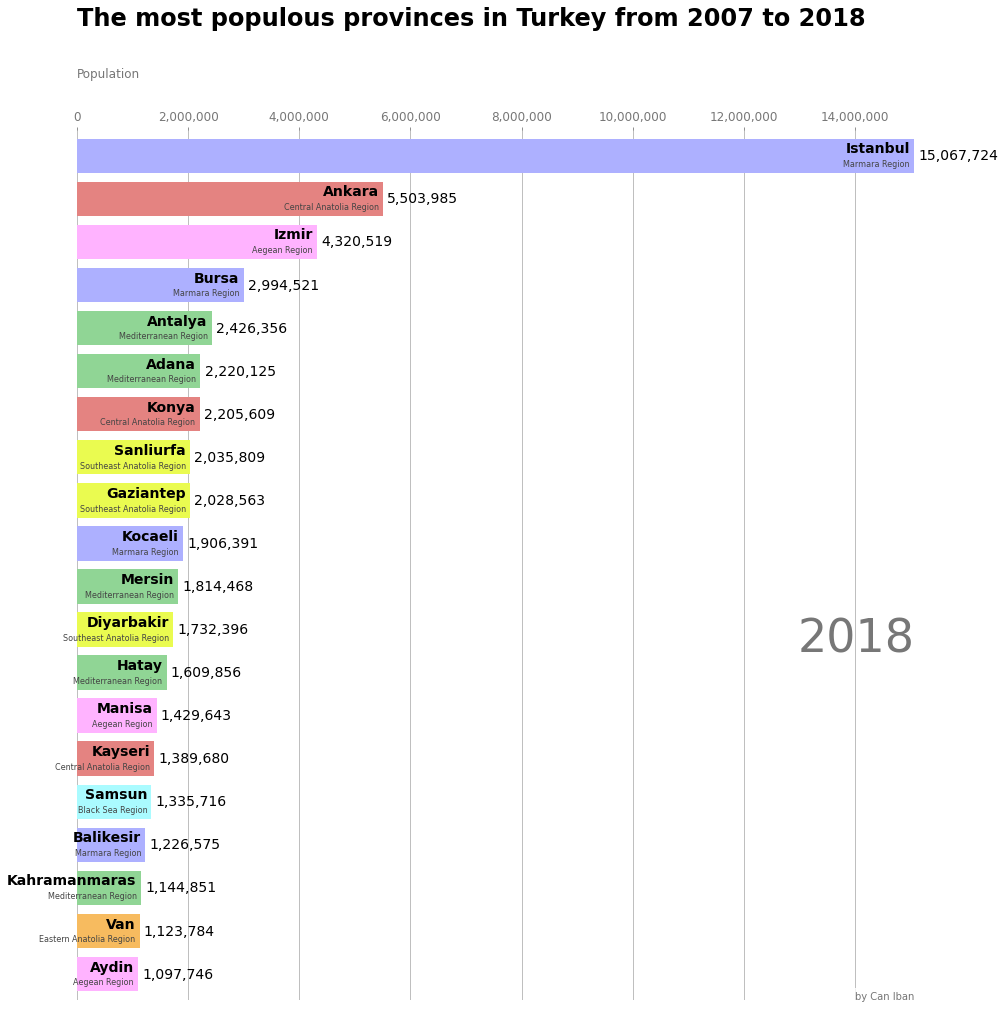

In [6]:
fig, ax = plt.subplots(figsize=(15, 16))

def draw_barchart(year):
    dff = df[df['year'].eq(year)].sort_values(by='population', ascending=True).tail(20)
    ax.clear()
    ax.barh(dff['province'], dff['population'], color=[colors[group_lk[x]] for x in dff['province']])
    dx = dff['population'].max() / 200
    for i, (value, name) in enumerate(zip(dff['population'], dff['province'])):
        ax.text(value-dx, i,     name,           size=14, weight=800, ha='right', va='bottom')
        ax.text(value-dx, i-.25, group_lk[name], size=8, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    # ... polished styles
    ax.text(1, 0.4, year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=500)
    ax.text(0, 1.06, 'Population', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'The most populous provinces in Turkey from 2007 to 2018',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'by Can Iban', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
draw_barchart(2018)

/var/folders/vl/lhnpkgxj7kq9xt68jt33d0c800qnqc/T/ipykernel_20123/447411293.py:18: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.set_yticks([])
/var/folders/vl/lhnpkgxj7kq9xt68jt33d0c800qnqc/T/ipykernel_20123/447411293.py:18: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.set_yticks([])
/var/folders/vl/lhnpkgxj7kq9xt68jt33d0c800qnqc/T/ipykernel_20123/447411293.py:18: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.set_yticks([])
/var/folders/vl/lhnpkgxj7kq9xt68jt33d0c800qnqc/T/ipykernel_20123/447411293.py:18: MatplotlibDeprecationWarning: Suppor

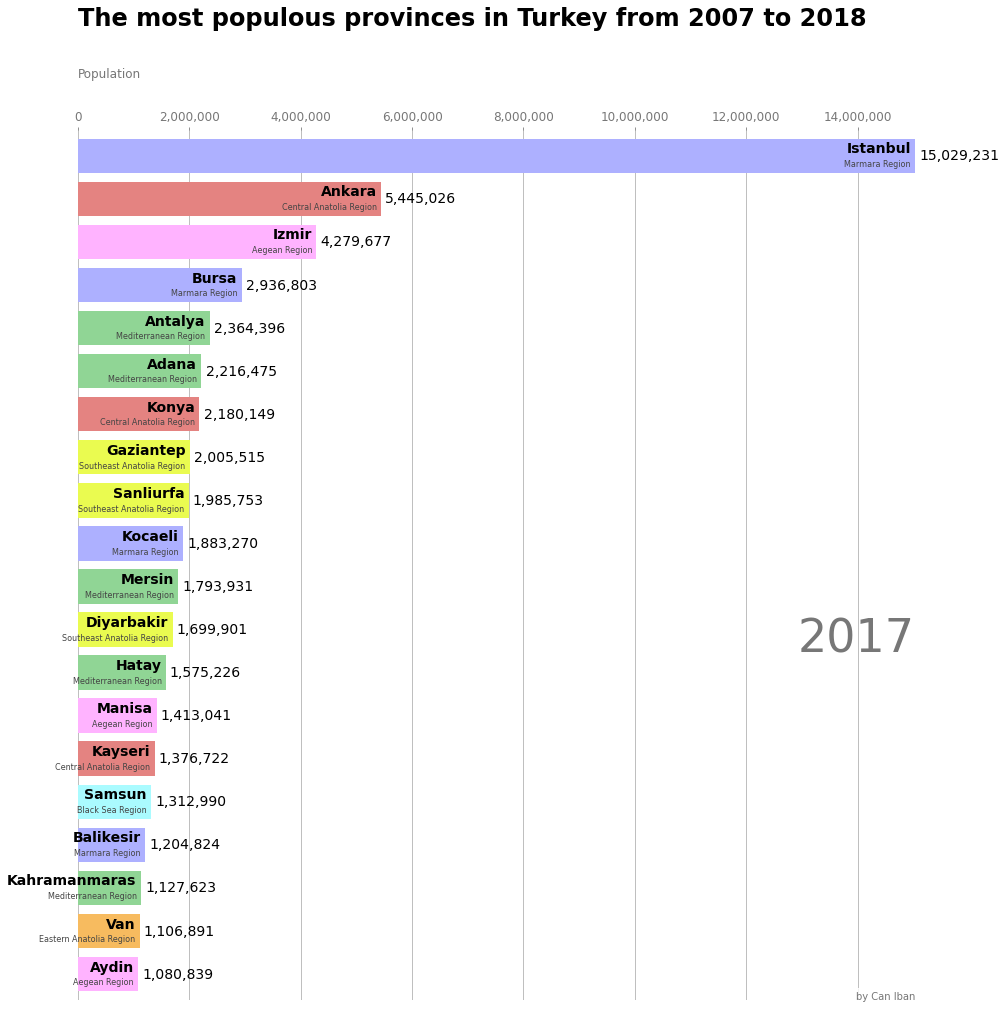

In [7]:
import matplotlib.animation as animation
from IPython.display import HTML

fig, ax = plt.subplots(figsize=(15, 16))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(2007, 2018))
HTML(animator.to_jshtml()) 